<a href="https://colab.research.google.com/github/dyh226/dyh226/blob/master/Copy_of_1_explore_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**: DYH226
-   **Name**: Claire Lym

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# TODO Q1
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=31928890d4c9fde9'
df = pd.read_csv(url, nrows = 1000000)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [106]:
# TODO Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547922 entries, 0 to 547921
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 546981 non-null  object 
 1   country_region                                      547922 non-null  object 
 2   sub_region_1                                        531587 non-null  object 
 3   sub_region_2                                        316625 non-null  object 
 4   iso_3166_2_code                                     198752 non-null  object 
 5   census_fips_code                                    316746 non-null  float64
 6   date                                                547922 non-null  object 
 7   retail_and_recreation_percent_change_from_baseline  423131 non-null  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   406061 non-n

In [107]:
# TODO Q3
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [108]:
# TODO Q4
df['date'] = pd.to_datetime(df['date'])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547922 entries, 0 to 547921
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   country_region_code                                 546981 non-null  object        
 1   country_region                                      547922 non-null  object        
 2   sub_region_1                                        531587 non-null  object        
 3   sub_region_2                                        316625 non-null  object        
 4   iso_3166_2_code                                     198752 non-null  object        
 5   census_fips_code                                    316746 non-null  float64       
 6   date                                                547922 non-null  datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  423131 non-null  float64       

Next, you are going to extract the subset of data for the location of
your choice. You can choose any location *except* Brooklyn, New York.
(You can’t choose Brooklyn because the example code I’m about to show
you is for Brooklyn.)

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single location. You can go down to the
`sub_region_1` level or the `sub_region_2` level - depending on the
location you chose, the finer level of granularity may not be available.

In [109]:
# TODO Q5
df_subset = df[(df['country_region'].eq("South Korea"))]
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 121159 to 121279
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 121 non-null    object        
 1   country_region                                      121 non-null    object        
 2   sub_region_1                                        0 non-null      object        
 3   sub_region_2                                        0 non-null      object        
 4   iso_3166_2_code                                     0 non-null      object        
 5   census_fips_code                                    0 non-null      float64       
 6   date                                                121 non-null    datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  121 non-null    float64       
 8   gr

Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

In [110]:
# TODO Q6
subset_total = df_subset.country_region_code.count()
truth_value = True
if subset_total != df_subset.retail_and_recreation_percent_change_from_baseline.count() :
  print ("Retail and recreation percentage data is missing")
  truth_value &= False
if subset_total != df_subset.grocery_and_pharmacy_percent_change_from_baseline.count() :
  print ("Grocery and pharmacy percentage data is missing")
  truth_value &= False
if subset_total != df_subset.parks_percent_change_from_baseline.count() :
  print ("Parks percentage data is missing")
  truth_value &= False
if subset_total != df_subset.transit_stations_percent_change_from_baseline.count() :
  print ("Transit stations percentage data is missing")
  truth_value &= False
if subset_total != df_subset.workplaces_percent_change_from_baseline.count() :
  print ("Workplaces percentage data is missing")
  truth_value &= False
if subset_total != df_subset.residential_percent_change_from_baseline.count() :
  print ("Residential percentage data is missing")
  truth_value &= False
if truth_value == True :
  print ("No percentage data is missing")


No percentage data is missing


**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? **Include a
short quote from the material you read in the “Learn about the data”
section to answer this question.**

**ANSWER:**

Here's a quote regarding the possible missing data according to the csv documentation:

"What data is included in the calculation depends on user settings, connectivity, and whether it meets our privacy threshold. If the privacy threshold isn’t met (when somewhere isn’t busy enough to ensure anonymity) we don’t show a change for the day. As a result, you may encounter empty fields for certain places and dates."

The Queens data is complete because the data they collected met privacy threshold requirements. 

---------------------------------------------------------------------------- 

For this data, the `date` field is important, but we don’t necessarily
care about the absolute date. Instead, we care about how many days have
elapsed since the first confirmed case of COVID-19 in this location, how
many days have elapsed since a “stay at home” order or similar rule was
established in this location (if there was one) and how many days have
elapsed since it was lifted (if applicable).

For example, in Brooklyn, New York, I might compute:

    days_since_lockdown = (df_ny_all['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values
    # NYC lockdown March 20, 2020 https://www.nytimes.com/2020/03/20/us/coronavirus-today.html

Compute “days since \[some relevant COVID-19 date\]” for your location.
In a comment, explain the significance of the date you have chosen, and
include a link to a news article or other reference supporting the
significance of the date. (The news article does not have to be in
English.)

In [111]:
# TODO Q8
days_since_firstcase = (df_subset['date'] - pd.to_datetime('2020-01-20')).dt.days.values
print(days_since_firstcase)
# First day of confirmed case in South Korea was January 20 https://www.cdc.go.kr/board/board.es?mid=a30402000000&bid=0030&act=view&list_no=365797

[ 26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146]


Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time.

In the following cell, create a figure with six subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the
`days_since...` array you computed in the previous cell. On the vertical
axes, show:

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the bottom subplot

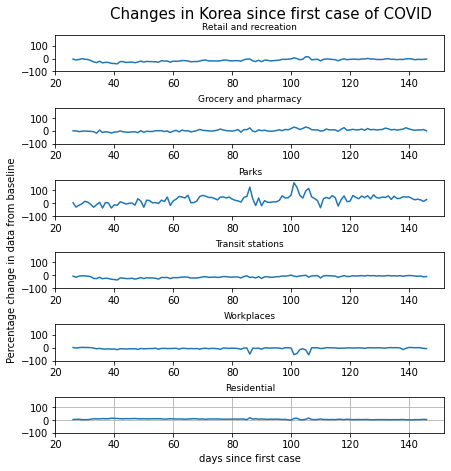

In [112]:
# TODO Q9
import numpy as np
x = days_since_firstcase
fig, axs = plt.subplots(6)
plt.subplots_adjust(left= 0, bottom=-0.5, right=None, top=None, wspace=None, hspace=1) 
axs[0].plot(x, np.array(df_subset['retail_and_recreation_percent_change_from_baseline']))
axs[0].set_title("Retail and recreation", size=9)
axs[1].plot(x, np.array(df_subset['grocery_and_pharmacy_percent_change_from_baseline']))
axs[1].set_title("Grocery and pharmacy", size=9)
axs[2].plot(x, np.array(df_subset['parks_percent_change_from_baseline']))
axs[2].set_title("Parks", size=9)
axs[3].plot(x, np.array(df_subset['transit_stations_percent_change_from_baseline']))
axs[3].set_title("Transit stations", size=9)
axs[4].plot(x, np.array(df_subset['workplaces_percent_change_from_baseline']))
axs[4].set_title("Workplaces", size=9)
axs[5].plot(x, np.array(df_subset['residential_percent_change_from_baseline']))
axs[5].set_title("Residential", size=9)
for x in range (0,6):
  axs[x].set_ylim(-100,180)
plt.xlabel('days since first case')
fig.suptitle("Changes in Korea since first case of COVID",size=15)
fig.text(-0.1, 0.1, 'Percentage change in data from baseline', ha='center', va='center', rotation='vertical')
plt.grid()

**TODO** Q10: Answer the following question: Do the results seem to
satisfy “common sense”? Explain, citing specific data from your plot to
support your answer.

**ANSWER:**

The results seem to satisfy "common sense". We see the biggest uptick in our graph for parks as days progressed from the first case. Since data is taken from February to June, it reflects the change from colder months to warmer Summer months. Korea never officially had a lockdown but citizens were encouraged to practice health guidelines. Parks which are openly ventilated areas would have seen regualar usage normal to this time of the year weather-wise. Other than parks, the rest of the data doesn't show a large change mostly staying near the baseline which makes sense for Korea.

---------------------------------------------------------------------------- 

**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why the data might *not*
be useful for understanding the effect of COVID-19-related lockdowns, or
why the data might be misleading. For the location you have chosen,
briefly answer all of the questions in that checklist. Based on your
answers, do you think there are any serious problems associated with
using this data for understanding user mobility changes due to COVID-19?

**ANSWER:**

Q1: Did anything significant happen between Jan 3 and Feb 6, 2020? 

Korea's weather is similar to New York so weather would have been appropriate to winter conditions and therefore cold. 

Q2: How do park visitors change from January to now?

With weather getting warmer compared to January, as the days progress forward, there is a rise in park visitors.

Q3: How much more time do you think people will spend in residential places?

Based on the fact that Korea didn't have a lockdown, I would guess the time spent in residential places would increase only a small amount.

Q4: How might types of work affect the mobility changes on weekdays or weekends?

Most jobs in Korea and more specifically in Seoul, would be desk jobs in companies. Much like New York City, most workers need to commute using public transportation and is a preferred method for its affordability and reliability. Since there was no lockdown or limitations given for public transportation, there is likely a small decline.

Q5: How well is your region represented?

Since the data is said to be from South Korea in general, it is hard to tell how well the region is represented. Korea has a main city, Seoul, where most of the population is centered. Korea being a country that didn't have a lockdown,  the change in data with the exception of parks accounting for warm weather, seems an appropriate data set representation of the region.




---------------------------------------------------------------------------- 